In [988]:
#connecting to the drive for accessing the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part-A **Attribute Oriented Induction**

## 1. Extract characteristic rules with attribute-oriented induction

### Data Exploration

In [989]:
#required libraries
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [990]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/Copy of cleaned_data.csv')
#df = pd.read_csv('/content/drive/MyDrive/DA1 Assignment/Data/cleaned_data.csv')

In [991]:
#verifying data is loaded
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285.0",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,0,1,1,0,0,0,0,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000.0",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,0,1,1,0,0,0,0,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752.0",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,0,0,1,1,0,0,0,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486.0",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303,Satyam Developers,ACTIVE,...,Unfurnished,4.0,0,0,1,1,0,0,0,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324.0",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,0,1,1,0,0,0,0,sell


In [992]:
df.shape

(143708, 32)

In [993]:
df.columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id',
       'Builder_name', 'Property_building_status', 'City_id', 'City_name',
       'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category'],
      dtype='object')

In [994]:
#converting into required datatypes 
df['Price'] = df['Price'].apply(lambda x:float(x.replace(',','')))
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:float(str(x).replace(',','')))
df['Size'] = df['Size'].apply(lambda x:x.replace(',',''))
df['Size'] = df['Size'].apply(lambda x:float(x.replace(' sq ft','')))

In [995]:
df['Price'].describe()

count    1.437080e+05
mean     1.365094e+07
std      1.940871e+07
min      1.000000e+05
25%      5.259438e+06
50%      8.500000e+06
75%      1.549800e+07
max      8.000000e+08
Name: Price, dtype: float64

In [996]:
df['Size'].describe()

count    143708.000000
mean       1277.933247
std         951.101861
min         100.000000
25%         720.000000
50%        1076.000000
75%        1516.000000
max       90000.000000
Name: Size, dtype: float64

In [997]:
df['Price_per_unit_area'].describe()

count    143708.000000
mean      10664.535600
std        8512.886153
min         104.000000
25%        5256.000000
50%        7938.000000
75%       13333.000000
max      171969.000000
Name: Price_per_unit_area, dtype: float64

checking the unique elements in the columns

In [998]:
for i in df.columns:
  print(i,':', len(list(df[i].unique())))
  if(len(list(df[i].unique())) < 25):
    print(i,':', (list(df[i].unique())))

Property_Name : 20509
Property_id : 100691
Property_type : 5
Property_type : ['Apartment', 'Independent House', 'Villa', 'Independent Floor', 'Residential Plot']
Property_status : 2
Property_status : ['Under Construction', 'Ready to move']
Price_per_unit_area : 21577
Posted_On : 76
Project_URL : 20674
builder_id : 8350
Builder_name : 8347
Property_building_status : 3
Property_building_status : ['ACTIVE', 'INACTIVE', 'UNVERIFIED']
City_id : 8
City_id : [1, 2, 5, 6, 12, 16, 23, 18]
City_name : 8
City_name : ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Lucknow', 'Mumbai']
No_of_BHK : 17
No_of_BHK : ['3 BHK', '4 BHK', '2 BHK', '5 BHK', '1 BHK', '1 RK', '0 BHK', '6 BHK', '7 BHK', '11 BHK', '9 BHK', '10 BHK', '8 BHK', '3 RK', '14 BHK', '2 RK', '12 BHK']
Locality_ID : 1252
Locality_Name : 1244
Longitude : 20572
Latitude : 21940
Price : 29490
Size : 4120
Sub_urban_ID : 91
Sub_urban_name : 84
description : 143708
is_furnished : 3
is_furnished : ['Unfurnished', 'Semi-F

### Concept Hierarchy

we defined concept hierarchy of maximum two levels for the possible attributes.

The decription of the concept hierarchy is it was dictionary of attributes where each attribute contains its own level wise hierarchies

We handled the continuous data and dicrete values differently with the help of the is_discrete variable.

In [999]:
concept_hierarchy = {
    'Price_per_unit_area':{
        0:{
                
            'budget': [0,10000], 
            'Luxury': [10000,50000],
            'Ultra_Luxury':[50000,1719690],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },
    'Property_type':{
        0:{
            'Apartment':'Group',
            'Independent Floor':'Group',
            'Independent House':'Independent living',
            'Villa':'Independent living',
            'Residential Plot':'Residential Plot',
            'is_discrete': True
        },
        1:{
           'Group':'Building',
           'Independent living':'Building',
           'Residential Plot': 'Plot',
           'is_discrete': True
        },
        2:{
            'Building':'Any',
            'Plot':'Any',
            'is_discrete': True
        }
    },
    
    'City_name':{
        0:{
          'Ahmedabad':'city',
          'Bangalore':'city',
          'Chennai':'metropolitan_city',
          'Delhi':'metropolitan_city',
          'Hyderabad':'city',
          'Kolkata':'metropolitan_city',
          'Lucknow':'city',
          'Mumbai':'metropolitan_city',
          'is_discrete':True
        },
       1:{
           'city':'Any',
           'metropolitan_city':'Any',
           'is_discrete':True
       } 
    },

    'Size':{
        0:{
            'small':[0,840],
            'medium':[840,1400],
            'large':[1400,90001],
            'is_discrete':False
        },
        1:{
            'small':'Any',
            'medium':'Any',
            'large':'Any',
            'is_discrete':True
        }
    },
    'Property_status':{
        0:{
            'Under Construction':'Any',
            'Ready to move':'Any',
            'is_discrete':True
        }
    },
    'Property_building_status':{
        0:{
            'ACTIVE':'Active',
            'INACTIVE':'Notactive',
            'UNVERIFIED':'Notactive',
            'is_discrete':True
        },
        1:{
            'Active':'Any',
            'Notactive':'Any',
            'is_discrete':True
        }
    },
    'is_furnished':{
        0:{
            'Unfurnished':'Any',
            'Semi-Furnished':'Any',
            'Furnished':'Any',
            'is_discrete':True
        }
    },
    'is_PentaHouse':{
        0:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'is_studio':{
        0:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'Price':{
        0:{
                
            'budget': [0,4300000], 
            'Luxury': [4300000,14000000],
            'Ultra_Luxury':[14000000,9000000000],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },

}

### Extracting charecterstics rules 

In [1000]:
#we set the removal threshold of the unique values to be 25
attribute_removal_threshold = 25

#we removing the redundant columns and the columns we felt not useful for the summarization task...
attributes_tobe_removed = ['City_id','is_furnished','No_of_BHK', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category']

#setting a threshold on the final tuples count.
threshold_on_tuples_count = 50

#variable of count of number of tuples
current_count = df.shape[0]

#dictionary to store the level attribute is present
attribute_levels = {}
for attribute in list(df.columns):
  if attribute in concept_hierarchy:
    attribute_levels[attribute]=0

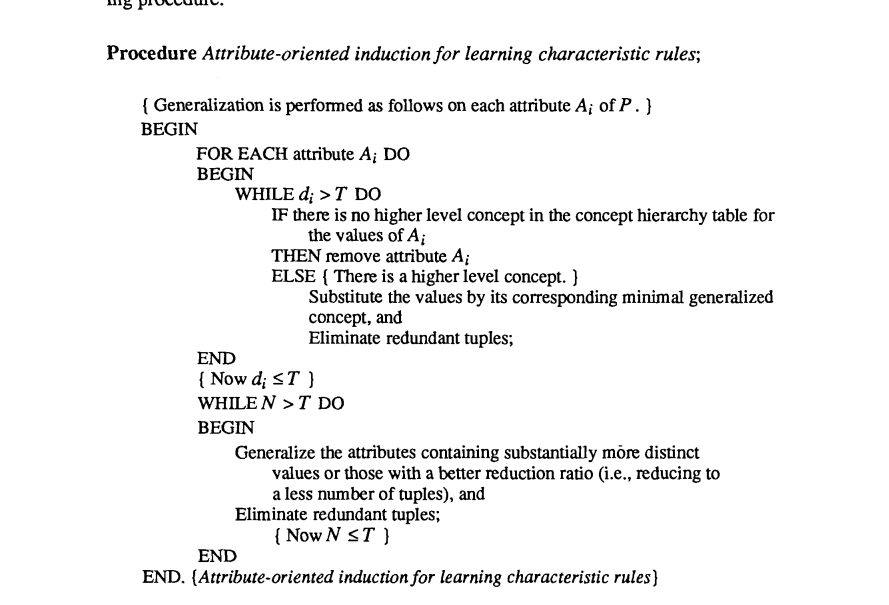

we followed the above algorithm as it is

In [1001]:
def up_onLevel(row,concept_hierarchy,attribute,level):
  level_dict = concept_hierarchy[attribute][level]
  if(level_dict['is_discrete'] == True):
    return level_dict[row]                                            #if the attribute is discrete at the particular level just return the value
  else:
    for key,val in level_dict.items():
      if(key!= 'is_discrete' and row >=val[0] and row < val[1]):
        return key                                                    #if the attribute is continuous at the particular level return key corresponding the value.

In [1002]:
columns_list = list(df.columns)
for attribute in columns_list:                                                                       #for every attribute in the columns list 
  
  if(attribute in attributes_tobe_removed):
    df = df.drop([attribute], axis=1)                                                                #dropping the attributes that we felt not contribute for the charecterstics 
  elif(len(list((df[attribute].unique()))) > attribute_removal_threshold ):                          #checking whether number of unique values are less than thresshold 
    if(attribute in concept_hierarchy):
      level = attribute_levels[attribute]
      df[attribute] = df[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))  #if concept hierarchy of a attribute with more unique values are present generalising it
      attribute_levels[attribute] = level+1
      
    else:
      df = df.drop([attribute], axis=1)                                                              #if no concept hierarchy for a attribute we drop the column
  
  df = df.drop_duplicates()                                                                          #dropping the duplicates.
  
current_count = df.shape[0]

while(current_count > threshold_on_tuples_count):                                                    #for the number of tuples less than the thresshold
  min_count = ["",current_count]
  is_changed = False
  for attribute in df.columns:                                                                      #checking which attribute gives us the better reduction ratio
    df_part = df.copy()

    if(attribute not in attribute_levels):
      continue
      

    if(attribute in concept_hierarchy and attribute_levels[attribute] in concept_hierarchy[attribute]):
      df_part[attribute] = df_part[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,attribute_levels[attribute]))
      df_part = df_part.drop_duplicates()
      if(min_count[1] > df_part.shape[0]):
        min_count[1] = df_part.shape[0]
        min_count[0] = attribute
        is_changed = True
  

                                                                                                  # if the minimum is found printing it and changing the df and increasing its level
  if(is_changed):

    level = attribute_levels[min_count[0]]
    df[min_count[0]] = df[min_count[0]].apply(lambda x:up_onLevel(x,concept_hierarchy,min_count[0],level))
    df = df.drop_duplicates()
    attribute_levels[min_count[0]]+=1
    current_count = min_count[1]
    print (min_count[0],": ",min_count[1])

  else:
    break

City_name :  276
Size :  141
Price :  64
Price_per_unit_area :  32


In [1003]:
df.head(40)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
0,Apartment,Under Construction,Any,ACTIVE,city,Any,Any
2,Apartment,Ready to move,Any,ACTIVE,city,Any,Any
25,Independent House,Under Construction,Any,ACTIVE,city,Any,Any
30,Villa,Under Construction,Any,ACTIVE,city,Any,Any
56,Villa,Ready to move,Any,ACTIVE,city,Any,Any
153,Independent House,Ready to move,Any,ACTIVE,city,Any,Any
164,Independent Floor,Ready to move,Any,ACTIVE,city,Any,Any
230,Residential Plot,Ready to move,Any,ACTIVE,city,Any,Any
395,Apartment,Ready to move,Any,INACTIVE,city,Any,Any
474,Residential Plot,Under Construction,Any,ACTIVE,city,Any,Any


**Rules for Property Type**

In [1004]:
df[df['Property_type']=='Apartment']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
0,Apartment,Under Construction,Any,ACTIVE,city,Any,Any
2,Apartment,Ready to move,Any,ACTIVE,city,Any,Any
395,Apartment,Ready to move,Any,INACTIVE,city,Any,Any
1040,Apartment,Ready to move,Any,UNVERIFIED,city,Any,Any
23141,Apartment,Under Construction,Any,INACTIVE,city,Any,Any
23958,Apartment,Under Construction,Any,UNVERIFIED,city,Any,Any
27636,Apartment,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
27637,Apartment,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
30499,Apartment,Ready to move,Any,UNVERIFIED,metropolitan_city,Any,Any
31238,Apartment,Ready to move,Any,INACTIVE,metropolitan_city,Any,Any


In [1005]:
df[df['Property_type']=='Villa']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
30,Villa,Under Construction,Any,ACTIVE,city,Any,Any
56,Villa,Ready to move,Any,ACTIVE,city,Any,Any
27631,Villa,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
27632,Villa,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
124636,Villa,Ready to move,Any,INACTIVE,metropolitan_city,Any,Any


In [1006]:
df[df['Property_type']=='Independent Floor']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
164,Independent Floor,Ready to move,Any,ACTIVE,city,Any,Any
4154,Independent Floor,Under Construction,Any,ACTIVE,city,Any,Any
30267,Independent Floor,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
41120,Independent Floor,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
67667,Independent Floor,Ready to move,Any,INACTIVE,metropolitan_city,Any,Any


In [1007]:
df[df['Property_type']=='Independent House']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
25,Independent House,Under Construction,Any,ACTIVE,city,Any,Any
153,Independent House,Ready to move,Any,ACTIVE,city,Any,Any
27038,Independent House,Under Construction,Any,UNVERIFIED,city,Any,Any
27647,Independent House,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
28766,Independent House,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any


In [1008]:
df[df['Property_type']=='Residential Plot']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
230,Residential Plot,Ready to move,Any,ACTIVE,city,Any,Any
474,Residential Plot,Under Construction,Any,ACTIVE,city,Any,Any
16103,Residential Plot,Ready to move,Any,INACTIVE,city,Any,Any
27635,Residential Plot,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
27639,Residential Plot,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any


In [1009]:
df[df['Property_type']=='Apartment']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
0,Apartment,Under Construction,Any,ACTIVE,city,Any,Any
2,Apartment,Ready to move,Any,ACTIVE,city,Any,Any
395,Apartment,Ready to move,Any,INACTIVE,city,Any,Any
1040,Apartment,Ready to move,Any,UNVERIFIED,city,Any,Any
23141,Apartment,Under Construction,Any,INACTIVE,city,Any,Any
23958,Apartment,Under Construction,Any,UNVERIFIED,city,Any,Any
27636,Apartment,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
27637,Apartment,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
30499,Apartment,Ready to move,Any,UNVERIFIED,metropolitan_city,Any,Any
31238,Apartment,Ready to move,Any,INACTIVE,metropolitan_city,Any,Any


∀(x)propertytype =>

((propertybuildingstatus(x) ∈ Active) ∧ (cityname(x) ∈ city)) ∨

((propertybuildingstatus(x) ∈ InActive) ∧ (cityname(x) ∈ city)) ∨

((propertybuildingstatus(x) ∈ U nverif ied) ∧ (cityname(x) ∈ city)) ∨

((propertybuildingstatus(x) ∈ Active) ∧ (cityname(x) ∈ metropolitoncity)) ∨

((propertybuildingstatus(x) ∈ InActive)∧(cityname(x) ∈ metropolitoncity))∨

((propertybuildingstatus(x) ∈ U nverif ied)∧(cityname(x) ∈ metropolitoncity))

from this we didnot establish any interesting charecterstic rules 

**property_status**

In [1010]:
df[df['Property_status']=='Ready to move']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
2,Apartment,Ready to move,Any,ACTIVE,city,Any,Any
56,Villa,Ready to move,Any,ACTIVE,city,Any,Any
153,Independent House,Ready to move,Any,ACTIVE,city,Any,Any
164,Independent Floor,Ready to move,Any,ACTIVE,city,Any,Any
230,Residential Plot,Ready to move,Any,ACTIVE,city,Any,Any
395,Apartment,Ready to move,Any,INACTIVE,city,Any,Any
1040,Apartment,Ready to move,Any,UNVERIFIED,city,Any,Any
16103,Residential Plot,Ready to move,Any,INACTIVE,city,Any,Any
27631,Villa,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
27637,Apartment,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any


In [1011]:
df[df['Property_status']=='Under Construction']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
0,Apartment,Under Construction,Any,ACTIVE,city,Any,Any
25,Independent House,Under Construction,Any,ACTIVE,city,Any,Any
30,Villa,Under Construction,Any,ACTIVE,city,Any,Any
474,Residential Plot,Under Construction,Any,ACTIVE,city,Any,Any
4154,Independent Floor,Under Construction,Any,ACTIVE,city,Any,Any
23141,Apartment,Under Construction,Any,INACTIVE,city,Any,Any
23958,Apartment,Under Construction,Any,UNVERIFIED,city,Any,Any
27038,Independent House,Under Construction,Any,UNVERIFIED,city,Any,Any
27632,Villa,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
27635,Residential Plot,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any


∀(x)propertystatus =>
((propertytype(x) ∈ {Apartment, Residentialplot}∧(propertybuildingstatus(x) ∈
InActive) ∧ (cityname(x) ∈ city)) ∨

((propertytype(x) ∈ {Apartment, Independent floor}, villa∧(propertybuildingstatus(x) ∈
InActive) ∧ (cityname(x) ∈ metropolitoncity)) ∨

((propertytype(x) ∈ {Apartment, IndependentHouse}∧(propertybuildingstatus(x) ∈
U nverif ied) ∧ (cityname(x) ∈ city)) ∨

((propertytype(x) ∈ Apartment ∧ (propertybuildingstatus(x) ∈ InActive) ∧
(cityname(x) ∈ metropolitoncity)) ∨

((propertytype(x) ∈ {Apartment, IndependentHouse, Independentf loor, villa, Residentialplot}∧
(propertybuildingstatus(x) ∈ InActive)∧(cityname(x) ∈ {city, metropolitoncity}))



**cities**

In [1012]:
df[df['City_name']=='city']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
0,Apartment,Under Construction,Any,ACTIVE,city,Any,Any
2,Apartment,Ready to move,Any,ACTIVE,city,Any,Any
25,Independent House,Under Construction,Any,ACTIVE,city,Any,Any
30,Villa,Under Construction,Any,ACTIVE,city,Any,Any
56,Villa,Ready to move,Any,ACTIVE,city,Any,Any
153,Independent House,Ready to move,Any,ACTIVE,city,Any,Any
164,Independent Floor,Ready to move,Any,ACTIVE,city,Any,Any
230,Residential Plot,Ready to move,Any,ACTIVE,city,Any,Any
395,Apartment,Ready to move,Any,INACTIVE,city,Any,Any
474,Residential Plot,Under Construction,Any,ACTIVE,city,Any,Any


In [1013]:
df[df['City_name']=='metropolitan_city']

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
27631,Villa,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
27632,Villa,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
27635,Residential Plot,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
27636,Apartment,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
27637,Apartment,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
27639,Residential Plot,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
27647,Independent House,Under Construction,Any,ACTIVE,metropolitan_city,Any,Any
28766,Independent House,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
30267,Independent Floor,Ready to move,Any,ACTIVE,metropolitan_city,Any,Any
30499,Apartment,Ready to move,Any,UNVERIFIED,metropolitan_city,Any,Any


∀(x)cityname =>
((propertytype(x) ∈ {Apartment, Residentialplot, Independenthouse, IndependentF loor, villa}∧
(propertybuildingstatus(x) ∈ Active)∧(propertystatus(x) ∈ {undercounstruction, readytomove}))∨

((propertytype(x) ∈ Apartment ∧ (propertybuildingstatus(x) ∈ InActive) ∧
(propertystatus(x) ∈ undercounstruction)) ∨

((propertytype(x) ∈ {Apartment, Residentialplot, IndependentF loor, villa} ∧

(propertybuildingstatus(x) ∈ InActive)∧(propertystatus(x) ∈ Readytomove))∨

((propertytype(x) ∈ {Apartment, IndepentHouse}∧(propertybuildingstatus(x) ∈
U nverif ied) ∧ (propertystatus(x) ∈ undercounstruction)) ∨

((propertytype(x) ∈ Apartment ∧ (propertybuildingstatus(x) ∈ U nverif ied) ∧
(propertystatus(x) ∈ readytomove))

## 2. Classification rules from the data set

**(i) property
status= under construction and property status= active**

***loading data and Preprocessing***

In [1014]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/Copy of cleaned_data.csv')

In [1015]:
#converting the given object column to the float column for our operations
df['Price'] = df['Price'].apply(lambda x:float(x.replace(',','')))
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:float(str(x).replace(',','')))
df['Size'] = df['Size'].apply(lambda x:x.replace(',',''))
df['Size'] = df['Size'].apply(lambda x:float(x.replace(' sq ft','')))

***concept hierarchy***

defined a new concept hierarchy relevant to the task

In [1016]:
concept_hierarchy = {
    'Price_per_unit_area':{
        0:{
                
            'budget': [0,10000], 
            'Luxury': [10000,50000],
            'Ultra_Luxury':[50000,1719690],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },
    'Property_type':{
        0:{
            'Apartment':'Group',
            'Independent Floor':'Group',
            'Independent House':'Independent living',
            'Villa':'Independent living',
            'Residential Plot':'Residential Plot',
            'is_discrete': True
        },
        1:{
           'Group':'Building',
           'Independent living':'Building',
           'Residential Plot': 'Plot',
           'is_discrete': True
        },
        2:{
            'Building':'Any',
            'Plot':'Any',
            'is_discrete': True
        }
    },
    
    'City_name':{
        0:{
          'Ahmedabad':'city',
          'Bangalore':'city',
          'Chennai':'metropolitan_city',
          'Delhi':'metropolitan_city',
          'Hyderabad':'city',
          'Kolkata':'metropolitan_city',
          'Lucknow':'city',
          'Mumbai':'metropolitan_city',
          'is_discrete':True
        },
       1:{
           'city':'Any',
           'metropolitan_city':'Any',
           'is_discrete':True
       } 
    },

    'Size':{
        0:{
            'small':[0,840],
            'medium':[840,1400],
            'large':[1400,90001],
            'is_discrete':False
        },
        1:{
            'small':'Any',
            'medium':'Any',
            'large':'Any',
            'is_discrete':True
        }
    },
    'Property_status':{
        1:{
            'Under Construction':'Any',
            'Ready to move':'Any',
            'is_discrete':True
        }
    },
    'Property_building_status':{
        0:{
            'ACTIVE':'Active',
            'INACTIVE':'Notactive',
            'UNVERIFIED':'Notactive',
            'is_discrete':True
        },
        1:{
            'Active':'Any',
            'Notactive':'Any',
            'is_discrete':True
        }
    },
    'is_furnished':{
        1:{
            'Unfurnished':'Any',
            'Semi-Furnished':'Any',
            'Furnished':'Any',
            'is_discrete':True
        }
    },
    'is_PentaHouse':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'is_studio':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'Price':{
        0:{
                
            'budget': [0,4300000], 
            'Luxury': [4300000,14000000],
            'Ultra_Luxury':[14000000,9000000000],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },

}

***classification rules extraction***

In [1017]:
#we set the removal threshold of the unique values to be 25
attribute_removal_threshold = 25

#we removing the redundant columns and the columns we felt not useful for the summarization task...
attributes_tobe_removed = ['City_id','is_furnished','No_of_BHK', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category']

#setting a threshold on the final tuples count.
threshold_on_tuples_count = 50

#variable of count of number of tuples
current_count = df.shape[0]

#dictionary to store the level attribute is present
attribute_levels = {}
for attribute in list(df.columns):
  if attribute in concept_hierarchy:
    attribute_levels[attribute]=0

In [1018]:
def up_onLevel(row,concept_hierarchy,attribute,level):
  level_dict = concept_hierarchy[attribute][level]
  if(level_dict['is_discrete'] == True):
    return level_dict[row]                                            #if the attribute is discrete at the particular level just return the value
  else:
    for key,val in level_dict.items():
      if(key!= 'is_discrete' and row >=val[0] and row < val[1]):
        return key                                                    #if the attribute is continuous at the particular level return key corresponding the value.

In [1019]:
def generalize_on_attribute_uniqueness(df, attribute_not_tobe_considered):


  cls = list(df.columns)
  for attribute in cls:                                                                                      #for every attribute in the columns list
    if(attribute == attribute_not_tobe_considered):                                                          #ignoring the classification attribute
      continue

    if(attribute in attributes_tobe_removed):                                                                #dropping the attributes that we felt not contribute for the charecterstics
      df = df.drop([attribute], axis=1)
    elif(len(list((df[attribute].unique()))) > attribute_removal_threshold ):                                # remove attribute if the distinct values greater than a specific threshold
      if(attribute in concept_hierarchy):
        level = attribute_levels[attribute]
        df[attribute] = df[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))  #if concept hierarchy of a attribute with more unique values are present generalising it
        attribute_levels[attribute] = level+1
      else:
        df = df.drop([attribute], axis=1)                                                                 #if no concept hierarchy for a attribute we drop the column
    
    rem_cls = list(df.columns)
    rem_cls.remove(attribute_not_tobe_considered)                                                
    df = df.drop_duplicates(subset= rem_cls,keep=False)                                                   #dropping the duplicates

  return df


In [1020]:
def generalization_on_tuple_count(df,attribute_not_tobe_considered,current_count):

  
  cls = list(df.columns)

  while(current_count > threshold_on_tuples_count):                                                              #for the number of tuples less than the thresshold
    min_count = ["",current_count]
    is_changed = False

    for attribute in cls:                                                                                       #checking for attribute of better reduction ratio

      if(attribute == attribute_not_tobe_considered):                                                            #not considering the classification attribute 
        continue
      
      df_part = df.copy()

      if(attribute not in attribute_levels):
        continue
        
      level = attribute_levels[attribute]

      if(level in concept_hierarchy[attribute]):
        df_part[attribute] = df_part[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))
        df_part = df_part.drop_duplicates()

        if(min_count[1] > df_part.shape[0]):
          min_count[1] = df_part.shape[0]
          min_count[0] = attribute
          is_changed = True
    

                                                                                                                    # if the minimum is found printing it and changing the df and increasing its level
    if(is_changed):

      level = attribute_levels[min_count[0]]
      df[min_count[0]] = df[min_count[0]].apply(lambda x:up_onLevel(x,concept_hierarchy,min_count[0],level))
      df = df.drop_duplicates()
      attribute_levels[min_count[0]]+=1
      current_count = min_count[1]
      print (min_count[0],": ",min_count[1])

    else:
      break

    rem_cls = list(df.columns)
    rem_cls.remove(attribute_not_tobe_considered)
    df = df.drop_duplicates(subset= rem_cls,keep=False)

  return df

In [1021]:
df_ps = generalize_on_attribute_uniqueness(df,'Property_status')
current_count = df_ps.shape[0]
df_ps = generalization_on_tuple_count(df_ps,'Property_status',current_count)

City_name :  154
Size :  76
Price :  41


In [1022]:
rem_cls = list(df_ps.columns)
rem_cls.remove('Property_status')
df_ps = df_ps.drop_duplicates(subset= rem_cls,keep=False)

In [1023]:
rem_cls

['Property_type',
 'Price_per_unit_area',
 'Property_building_status',
 'City_name',
 'Price',
 'Size']

In [1024]:
df_ps_uc = df_ps[df_ps['Property_status']=='Under Construction']
df_ps_ac = df_ps[df_ps['Property_status']== 'Ready to move']

In [1025]:
df_ps_uc.head(20)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
1054,Residential Plot,Under Construction,budget,ACTIVE,city,Any,Any
27038,Independent House,Under Construction,Luxury,UNVERIFIED,city,Any,Any
37950,Apartment,Under Construction,Luxury,ACTIVE,metropolitan_city,Any,Any
68695,Apartment,Under Construction,Ultra_Luxury,ACTIVE,metropolitan_city,Any,Any
126005,Apartment,Under Construction,Luxury,INACTIVE,metropolitan_city,Any,Any


∀(x)propertystatus ∈ underconstruction =>

((propertytype(x) ∈ IndependentHouse)∧(propertybuildingstatus(x) ∈ U nverif ied)∧
(priceperunitarea(x) ∈ Luxury) ∧ (cityname(x) ∈ city)) ∨

((propertytype(x) ∈ Apartment) ∧ (propertybuildingstatus(x) ∈ Inactive) ∧
(priceperunitarea(x) ∈ Luxury) ∧ (cityname(x) ∈ metropolitoncity)) ∨

((propertytype(x) ∈ Apartment) ∧ (propertybuildingstatus(x) ∈ Active) ∧
(priceperunitarea(x) ∈ Luxury) ∧ (cityname(x) ∈ metropolitoncity)) ∨

((propertytype(x) ∈ ResidentialP lot)∧(propertybuildingstatus(x) ∈ Active)∧
(priceperunitarea(x) ∈ Budget) ∧ (cityname(x) ∈ city)) ∨

((propertytype(x) ∈ Apartment) ∧ (propertybuildingstatus(x) ∈ Active) ∧
(priceperunitarea(x) ∈ ultraLuxury) ∧ (cityname(x) ∈ metropolitoncity))


In [1026]:
df_ps_ac.head(40)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
395,Apartment,Ready to move,budget,INACTIVE,city,Any,Any
1040,Apartment,Ready to move,budget,UNVERIFIED,city,Any,Any
2248,Independent Floor,Ready to move,Luxury,ACTIVE,city,Any,Any
6602,Independent House,Ready to move,budget,ACTIVE,city,Any,Any
16103,Residential Plot,Ready to move,Luxury,INACTIVE,city,Any,Any
18133,Independent Floor,Ready to move,budget,ACTIVE,city,Any,Any
24151,Residential Plot,Ready to move,budget,INACTIVE,city,Any,Any
30499,Apartment,Ready to move,budget,UNVERIFIED,metropolitan_city,Any,Any
34832,Apartment,Ready to move,budget,INACTIVE,metropolitan_city,Any,Any
43592,Residential Plot,Ready to move,Luxury,ACTIVE,metropolitan_city,Any,Any


∀(x)propertystatus ∈ readytomove =>

((propertytype(x) ∈ {IndependentF loor, villa})∧(propertybuildingstatus(x) ∈
Active)∧(priceperunitarea(x) ∈ U ltraluxury)∧(cityname(x) ∈ {city, metropolitoncity}))∨

((propertytype(x) ∈ {IndependentF loor, Apartment, villa})∧(propertybuildingstatus(x) ∈
InActive)∧(priceperunitarea(x) ∈ Budget)∧(cityname(x) ∈ metropolitoncity))∨

((propertytype(x) ∈ {Residentialplot, Apartment})∧(propertybuildingstatus(x) ∈
InActive)∧(priceperunitarea(x) ∈ {Budget, luxury})∧(cityname(x) ∈ city))∨

((propertytype(x) ∈ {Residentialplot, Apartment, IndependentF loor, Independenthouse})∧
(propertybuildingstatus(x) ∈ Active)∧(priceperunitarea(x) ∈ {Budget, luxury})∧
(cityname(x) ∈ city, metropolitoncity))


**(ii) City=
Technology city (Hyderabad, Bangalore, Chennai, Mumbai) and
City= Other cities (Ahmedabad, Kolkata, Delhi, Lucknow)**

***loading data and Preprocessing***

In [1027]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/Copy of cleaned_data.csv')

In [1028]:
#converting the given object column to the float column for our operations
df['Price'] = df['Price'].apply(lambda x:float(x.replace(',','')))
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:float(str(x).replace(',','')))
df['Size'] = df['Size'].apply(lambda x:x.replace(',',''))
df['Size'] = df['Size'].apply(lambda x:float(x.replace(' sq ft','')))

In [1029]:
cities_map = {'Ahmedabad':'other_city',
          'Bangalore':'techonology_city',
          'Chennai':'techonology_city',
          'Delhi':'other_city',
          'Hyderabad':'techonology_city',
          'Kolkata':'other_city',
          'Lucknow':'other_city',
          'Mumbai':'techonology_city',}

In [1030]:
def up(row,cities_map):
    return cities_map[row]

In [1031]:
df['City_name'] = df['City_name'].apply(lambda x:up(x,cities_map))

***concept hierarchy***

defined a new concept hierarchy relevant to the task

In [1032]:
concept_hierarchy = {
    'Price_per_unit_area':{
        0:{
                
            'budget': [0,10000], 
            'Luxury': [10000,50000],
            'Ultra_Luxury':[50000,1719690],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },
    'Property_type':{
        0:{
            'Apartment':'Group',
            'Independent Floor':'Group',
            'Independent House':'Independent living',
            'Villa':'Independent living',
            'Residential Plot':'Residential Plot',
            'is_discrete': True
        },
        1:{
           'Group':'Building',
           'Independent living':'Building',
           'Residential Plot': 'Plot',
           'is_discrete': True
        },
        2:{
            'Building':'Any',
            'Plot':'Any',
            'is_discrete': True
        }
    },
    
    'City_name':{
        0:{
          'Ahmedabad':'city',
          'Bangalore':'city',
          'Chennai':'metropolitan_city',
          'Delhi':'metropolitan_city',
          'Hyderabad':'city',
          'Kolkata':'metropolitan_city',
          'Lucknow':'city',
          'Mumbai':'metropolitan_city',
          'is_discrete':True
        },
       1:{
           'city':'Any',
           'metropolitan_city':'Any',
           'is_discrete':True
       } 
    },

    'Size':{
        0:{
            'small':[0,840],
            'medium':[840,1400],
            'large':[1400,90001],
            'is_discrete':False
        },
        1:{
            'small':'Any',
            'medium':'Any',
            'large':'Any',
            'is_discrete':True
        }
    },
    'Property_status':{
        1:{
            'Under Construction':'Any',
            'Ready to move':'Any',
            'is_discrete':True
        }
    },
    'Property_building_status':{
        0:{
            'ACTIVE':'Active',
            'INACTIVE':'Notactive',
            'UNVERIFIED':'Notactive',
            'is_discrete':True
        },
        1:{
            'Active':'Any',
            'Notactive':'Any',
            'is_discrete':True
        }
    },
    'is_furnished':{
        1:{
            'Unfurnished':'Any',
            'Semi-Furnished':'Any',
            'Furnished':'Any',
            'is_discrete':True
        }
    },
    'is_PentaHouse':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'is_studio':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'Price':{
        0:{
                
            'budget': [0,4300000], 
            'Luxury': [4300000,14000000],
            'Ultra_Luxury':[14000000,9000000000],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },

}

***classification rules extraction***

In [1033]:
#we set the removal threshold of the unique values to be 25
attribute_removal_threshold = 25

#we removing the redundant columns and the columns we felt not useful for the summarization task...
attributes_tobe_removed = ['City_id','is_furnished','No_of_BHK', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category']

#setting a threshold on the final tuples count.
threshold_on_tuples_count = 50

#variable of count of number of tuples
current_count = df.shape[0]

#dictionary to store the level attribute is present
attribute_levels = {}
for attribute in list(df.columns):
  if attribute in concept_hierarchy:
    attribute_levels[attribute]=0

In [1034]:
def up_onLevel(row,concept_hierarchy,attribute,level):
  level_dict = concept_hierarchy[attribute][level]
  if(level_dict['is_discrete'] == True):
    return level_dict[row]                                            #if the attribute is discrete at the particular level just return the value
  else:
    for key,val in level_dict.items():
      if(key!= 'is_discrete' and row >=val[0] and row < val[1]):
        return key                                                    #if the attribute is continuous at the particular level return key corresponding the value.

In [1035]:
def generalize_on_attribute_uniqueness(df, attribute_not_tobe_considered):


  cls = list(df.columns)
  for attribute in cls:                                                                                      #for every attribute in the columns list
    if(attribute == attribute_not_tobe_considered):                                                          #ignoring the classification attribute
      continue

    if(attribute in attributes_tobe_removed):                                                                #dropping the attributes that we felt not contribute for the charecterstics
      df = df.drop([attribute], axis=1)
    elif(len(list((df[attribute].unique()))) > attribute_removal_threshold ):                                # remove attribute if the distinct values greater than a specific threshold
      if(attribute in concept_hierarchy):
        level = attribute_levels[attribute]
        df[attribute] = df[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))  #if concept hierarchy of a attribute with more unique values are present generalising it
        attribute_levels[attribute] = level+1
      else:
        df = df.drop([attribute], axis=1)                                                                 #if no concept hierarchy for a attribute we drop the column
    
    rem_cls = list(df.columns)
    rem_cls.remove(attribute_not_tobe_considered)                                                
    df = df.drop_duplicates(subset= rem_cls,keep=False)                                                   #dropping the duplicates

  return df


In [1036]:
def generalization_on_tuple_count(df,attribute_not_tobe_considered,current_count):

  
  cls = list(df.columns)

  while(current_count > threshold_on_tuples_count):                                                              #for the number of tuples less than the thresshold
    min_count = ["",current_count]
    is_changed = False

    for attribute in cls:                                                                                       #checking for attribute of better reduction ratio

      if(attribute == attribute_not_tobe_considered):                                                            #not considering the classification attribute 
        continue
      
      df_part = df.copy()

      if(attribute not in attribute_levels):
        continue
        
      level = attribute_levels[attribute]

      if(level in concept_hierarchy[attribute]):
        df_part[attribute] = df_part[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))
        df_part = df_part.drop_duplicates()

        if(min_count[1] > df_part.shape[0]):
          min_count[1] = df_part.shape[0]
          min_count[0] = attribute
          is_changed = True
    

                                                                                                                    # if the minimum is found printing it and changing the df and increasing its level
    if(is_changed):

      level = attribute_levels[min_count[0]]
      df[min_count[0]] = df[min_count[0]].apply(lambda x:up_onLevel(x,concept_hierarchy,min_count[0],level))
      df = df.drop_duplicates()
      attribute_levels[min_count[0]]+=1
      current_count = min_count[1]
      print (min_count[0],": ",min_count[1])

    else:
      break

    rem_cls = list(df.columns)
    rem_cls.remove(attribute_not_tobe_considered)
    df = df.drop_duplicates(subset= rem_cls,keep=False)

  return df

In [1037]:
df_c = generalize_on_attribute_uniqueness(df,'City_name')
current_count = df_c.shape[0]
df_c = generalization_on_tuple_count(df_c,'City_name',current_count)

Size :  56
Price :  35


In [1038]:
df_c_oc = df_c[df_c['City_name']=='other_city']
df_c_tc = df_c[df_c['City_name']== 'techonology_city']

In [1039]:
df_c_oc.head(20)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
5078,Villa,Ready to move,budget,ACTIVE,other_city,Any,Any
6260,Independent Floor,Ready to move,budget,ACTIVE,other_city,Any,Any
6556,Apartment,Ready to move,budget,ACTIVE,other_city,Any,Any
43592,Residential Plot,Ready to move,Luxury,ACTIVE,other_city,Any,Any
47347,Villa,Ready to move,Ultra_Luxury,ACTIVE,other_city,Any,Any
67673,Independent Floor,Ready to move,budget,INACTIVE,other_city,Any,Any


∀(x)citytype ∈ othercity =>

((propertytype(x) ∈ {IndependentF loor})∧(propertybuildingstatus(x) ∈ InActive)∧
(priceperunitarea(x) ∈ {Budget}) ∧ (propertystatus(x) ∈ readytomove)) ∨

((propertytype(x) ∈ {Residentialplot})∧(propertybuildingstatus(x) ∈ Active)∧
(priceperunitarea(x) ∈ {Luxury}) ∧ (propertystatus(x) ∈ readytomove)) ∨

((propertytype(x) ∈ {IndependentF loor, villa, apartment})∧(propertybuildingstatus(x) ∈
InActive)∧(priceperunitarea(x) ∈ {Budget, ultraluxury})∧(propertystatus(x) ∈
readytomove))

In [1040]:
df_c_tc.head(40)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
16103,Residential Plot,Ready to move,Luxury,INACTIVE,techonology_city,Any,Any
24151,Residential Plot,Ready to move,budget,INACTIVE,techonology_city,Any,Any
26904,Independent House,Under Construction,budget,ACTIVE,techonology_city,Any,Any
27038,Independent House,Under Construction,Luxury,UNVERIFIED,techonology_city,Any,Any
27048,Independent House,Ready to move,Luxury,ACTIVE,techonology_city,Any,Any
32481,Villa,Under Construction,budget,ACTIVE,techonology_city,Any,Any
34832,Apartment,Ready to move,budget,INACTIVE,techonology_city,Any,Any
36854,Villa,Ready to move,Luxury,ACTIVE,techonology_city,Any,Any
38746,Apartment,Under Construction,budget,INACTIVE,techonology_city,Any,Any
40927,Residential Plot,Under Construction,budget,ACTIVE,techonology_city,Any,Any


∀(x)citytype ∈ techonologycity =>

((propertytype(x) ∈ {IndependentF loor})∧(propertybuildingstatus(x) ∈ Active)∧
(priceperunitarea(x) ∈ {ultraluxury})∧(propertystatus(x) ∈ readytomove))∨

((propertytype(x) ∈ {apartment}) ∧ (propertybuildingstatus(x) ∈ Active) ∧
(priceperunitarea(x) ∈ {ultraluxury})∧(propertystatus(x) ∈ underconstruction))∨

((propertytype(x) ∈ {Residentialplot, independenthouse})∧(propertybuildingstatus(x) ∈
unverif ied)∧(priceperunitarea(x) ∈ {luxury})∧(propertystatus(x) ∈ underconstruction))∨

((propertytype(x) ∈ {apartment})∧(propertybuildingstatus(x) ∈ unverif ied)∧
(priceperunitarea(x) ∈ {luxury}) ∧ (propertystatus(x) ∈ readytomove)) ∨

((propertytype(x) ∈ {apartment, independentf loor, independenthouse, residentialplot})∧
(propertybuildingstatus(x) ∈ Active)∧(priceperunitarea(x) ∈ {luxury, budget})∧
(propertystatus(x) ∈ readytomove)) ∨

((propertytype(x) ∈ {apartment, independentf loor, independenthouse, residentialplot, villa})∧
(propertybuildingstatus(x) ∈ Active)∧(priceperunitarea(x) ∈ {luxury, budget})∧
(propertystatus(x) ∈ readytomove))



**(iii) Price
per unit area= Budget (range1 [100 - 10000]), Price per unit area=
Luxury (range2 [10000 - 50000]), Price per unit area= Ultra Luxury
(range3 [50000 - 100000]).**

***loading data and Preprocessing***

In [1041]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/Copy of cleaned_data.csv')

In [1042]:
#converting the given object column to the float column for our operations
df['Price'] = df['Price'].apply(lambda x:float(x.replace(',','')))
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:float(str(x).replace(',','')))
df['Size'] = df['Size'].apply(lambda x:x.replace(',',''))
df['Size'] = df['Size'].apply(lambda x:float(x.replace(' sq ft','')))

In [1043]:
prices_range = {
    'Budget':[100,10000],
    'Luxury':[10000,50000],
    'Ultra_luxury':[50000,200000],
}

In [1044]:
def up(row,prices_range):
    for key,val in prices_range.items():
      if(row >=val[0] and row < val[1]):
        return key

In [1045]:
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:up(x,prices_range))

***concept hierarchy***

defined a new concept hierarchy relevant to the task

In [1046]:
concept_hierarchy = {
    'Price_per_unit_area':{
        0:{
                
            'budget': [0,10000], 
            'Luxury': [10000,50000],
            'Ultra_Luxury':[50000,1719690],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },
    'Property_type':{
        0:{
            'Apartment':'Group',
            'Independent Floor':'Group',
            'Independent House':'Independent living',
            'Villa':'Independent living',
            'Residential Plot':'Residential Plot',
            'is_discrete': True
        },
        1:{
           'Group':'Building',
           'Independent living':'Building',
           'Residential Plot': 'Plot',
           'is_discrete': True
        },
        2:{
            'Building':'Any',
            'Plot':'Any',
            'is_discrete': True
        }
    },
    
    'City_name':{
        0:{
          'Ahmedabad':'city',
          'Bangalore':'city',
          'Chennai':'metropolitan_city',
          'Delhi':'metropolitan_city',
          'Hyderabad':'city',
          'Kolkata':'metropolitan_city',
          'Lucknow':'city',
          'Mumbai':'metropolitan_city',
          'is_discrete':True
        },
       1:{
           'city':'Any',
           'metropolitan_city':'Any',
           'is_discrete':True
       } 
    },

    'Size':{
        0:{
            'small':[0,840],
            'medium':[840,1400],
            'large':[1400,90001],
            'is_discrete':False
        },
        1:{
            'small':'Any',
            'medium':'Any',
            'large':'Any',
            'is_discrete':True
        }
    },
    'Property_status':{
        1:{
            'Under Construction':'Any',
            'Ready to move':'Any',
            'is_discrete':True
        }
    },
    'Property_building_status':{
        0:{
            'ACTIVE':'Active',
            'INACTIVE':'Notactive',
            'UNVERIFIED':'Notactive',
            'is_discrete':True
        },
        1:{
            'Active':'Any',
            'Notactive':'Any',
            'is_discrete':True
        }
    },
    'is_furnished':{
        1:{
            'Unfurnished':'Any',
            'Semi-Furnished':'Any',
            'Furnished':'Any',
            'is_discrete':True
        }
    },
    'is_PentaHouse':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'is_studio':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'Price':{
        0:{
                
            'budget': [0,4300000], 
            'Luxury': [4300000,14000000],
            'Ultra_Luxury':[14000000,9000000000],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },

}

***classification rules extraction***

In [1047]:
#we set the removal threshold of the unique values to be 25
attribute_removal_threshold = 25

#we removing the redundant columns and the columns we felt not useful for the summarization task...
attributes_tobe_removed = ['City_id','is_furnished','No_of_BHK', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category']

#setting a threshold on the final tuples count.
threshold_on_tuples_count = 50

#variable of count of number of tuples
current_count = df.shape[0]

#dictionary to store the level attribute is present
attribute_levels = {}
for attribute in list(df.columns):
  if attribute in concept_hierarchy:
    attribute_levels[attribute]=0

In [1048]:
def up_onLevel(row,concept_hierarchy,attribute,level):
  level_dict = concept_hierarchy[attribute][level]
  if(level_dict['is_discrete'] == True):
    return level_dict[row]                                            #if the attribute is discrete at the particular level just return the value
  else:
    for key,val in level_dict.items():
      if(key!= 'is_discrete' and row >=val[0] and row < val[1]):
        return key                                                    #if the attribute is continuous at the particular level return key corresponding the value.

In [1049]:
def generalize_on_attribute_uniqueness(df, attribute_not_tobe_considered):


  cls = list(df.columns)
  for attribute in cls:                                                                                      #for every attribute in the columns list
    if(attribute == attribute_not_tobe_considered):                                                          #ignoring the classification attribute
      continue

    if(attribute in attributes_tobe_removed):                                                                #dropping the attributes that we felt not contribute for the charecterstics
      df = df.drop([attribute], axis=1)
    elif(len(list((df[attribute].unique()))) > attribute_removal_threshold ):                                # remove attribute if the distinct values greater than a specific threshold
      if(attribute in concept_hierarchy):
        level = attribute_levels[attribute]
        df[attribute] = df[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))  #if concept hierarchy of a attribute with more unique values are present generalising it
        attribute_levels[attribute] = level+1
      else:
        df = df.drop([attribute], axis=1)                                                                 #if no concept hierarchy for a attribute we drop the column
    
    rem_cls = list(df.columns)
    rem_cls.remove(attribute_not_tobe_considered)                                                
    df = df.drop_duplicates(subset= rem_cls,keep=False)                                                   #dropping the duplicates

  return df


In [1050]:
def generalization_on_tuple_count(df,attribute_not_tobe_considered,current_count):

  
  cls = list(df.columns)

  while(current_count > threshold_on_tuples_count):                                                              #for the number of tuples less than the thresshold
    min_count = ["",current_count]
    is_changed = False

    for attribute in cls:                                                                                       #checking for attribute of better reduction ratio

      if(attribute == attribute_not_tobe_considered):                                                            #not considering the classification attribute 
        continue
      
      df_part = df.copy()

      if(attribute not in attribute_levels):
        continue
        
      level = attribute_levels[attribute]

      if(level in concept_hierarchy[attribute]):
        df_part[attribute] = df_part[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))
        df_part = df_part.drop_duplicates()

        if(min_count[1] > df_part.shape[0]):
          min_count[1] = df_part.shape[0]
          min_count[0] = attribute
          is_changed = True
    

                                                                                                                    # if the minimum is found printing it and changing the df and increasing its level
    if(is_changed):

      level = attribute_levels[min_count[0]]
      df[min_count[0]] = df[min_count[0]].apply(lambda x:up_onLevel(x,concept_hierarchy,min_count[0],level))
      df = df.drop_duplicates()
      attribute_levels[min_count[0]]+=1
      current_count = min_count[1]
      print (min_count[0],": ",min_count[1])

    else:
      break

    rem_cls = list(df.columns)
    rem_cls.remove(attribute_not_tobe_considered)
    df = df.drop_duplicates(subset= rem_cls,keep=False)

  return df

In [1051]:
df_pa = generalize_on_attribute_uniqueness(df,'Price_per_unit_area')
current_count = df_pa.shape[0]
df_pa = generalization_on_tuple_count(df_pa,'Price_per_unit_area',current_count)

City_name :  153
Size :  79
Price :  41


In [1052]:
df_pa.shape

(19, 7)

In [1053]:
df_pa_b = df_pa[df_pa['Price_per_unit_area']=='Budget']
df_pa_l = df_pa[df_pa['Price_per_unit_area']== 'Luxury']
df_pa_ul = df_pa[df_pa['Price_per_unit_area']== 'Ultra_luxury']

In [1054]:
df_pa_b.head(20)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
183,Villa,Ready to move,Budget,ACTIVE,city,Any,Any
395,Apartment,Ready to move,Budget,INACTIVE,city,Any,Any
1040,Apartment,Ready to move,Budget,UNVERIFIED,city,Any,Any
1054,Residential Plot,Under Construction,Budget,ACTIVE,city,Any,Any
5079,Apartment,Ready to move,Budget,ACTIVE,city,Any,Any
6260,Independent Floor,Ready to move,Budget,ACTIVE,city,Any,Any
6602,Independent House,Ready to move,Budget,ACTIVE,city,Any,Any
23159,Apartment,Under Construction,Budget,ACTIVE,city,Any,Any
30266,Villa,Ready to move,Budget,ACTIVE,metropolitan_city,Any,Any
30267,Independent Floor,Ready to move,Budget,ACTIVE,metropolitan_city,Any,Any


∀(x)pricerange ∈ budget => 

((propertytype(x) ∈ {IndependentF loor, villa, apartment})∧
(propertybuildingstatus(x) ∈ Inactive)∧(cityname(x) ∈ {city, metropolitoncity})∧
(propertystatus(x) ∈ readytomove)) ∨

(propertytype(x) ∈ {apartment})∧(propertybuildingstatus(x) ∈ U nverif ied)∧
(cityname(x) ∈ {city, metropolitoncity})∧(propertystatus(x) ∈ {underconstruction, readytomove}))∨

(propertytype(x) ∈ {apartment, IndependentF loor, villa, Independenthouse, residentialplot})∧
(propertybuildingstatus(x) ∈ U nverif ied)∧(cityname(x) ∈ {city, metropolitoncity})∧
(propertystatus(x) ∈ {underconstruction, readytomove}))


In [1055]:
df_pa_l.head(20)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size
27038,Independent House,Under Construction,Luxury,UNVERIFIED,city,Any,Any


∀(x)pricerange ∈ luxury => 

((propertytype(x) ∈ {IndependentHouse}) ∧
(propertybuildingstatus(x) ∈ U nverif ied)∧(cityname(x) ∈ {city})∧(propertystatus(x) ∈ underconstruction))



In [1056]:
df_pa_ul.head(20)

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size


## 3.the final summarization relation and corresponding logic formulas

***Properties within tech-emerging cities like Hyderabad,
Bangalore, Chennai, and Mumbai that are active.***

***loading data and Preprocessing***

In [1057]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/Copy of cleaned_data.csv')

In [1058]:
#converting the given object column to the float column for our operations
df['Price'] = df['Price'].apply(lambda x:float(x.replace(',','')))
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:float(str(x).replace(',','')))
df['Size'] = df['Size'].apply(lambda x:x.replace(',',''))
df['Size'] = df['Size'].apply(lambda x:float(x.replace(' sq ft','')))

***concept hierarchy***

defined a new concept hierarchy relevant to the task

In [1059]:
concept_hierarchy = {
    'Price_per_unit_area':{
        0:{
                
            'budget': [0,10000], 
            'Luxury': [10000,50000],
            'Ultra_Luxury':[50000,1719690],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },
    'Property_type':{
        0:{
            'Apartment':'Group',
            'Independent Floor':'Group',
            'Independent House':'Independent living',
            'Villa':'Independent living',
            'Residential Plot':'Residential Plot',
            'is_discrete': True
        },
        1:{
           'Group':'Building',
           'Independent living':'Building',
           'Residential Plot': 'Plot',
           'is_discrete': True
        },
        2:{
            'Building':'Any',
            'Plot':'Any',
            'is_discrete': True
        }
    },
    
    'City_name':{
        0:{
          'Ahmedabad':'city',
          'Bangalore':'city',
          'Chennai':'metropolitan_city',
          'Delhi':'metropolitan_city',
          'Hyderabad':'city',
          'Kolkata':'metropolitan_city',
          'Lucknow':'city',
          'Mumbai':'metropolitan_city',
          'is_discrete':True
        },
       1:{
           'city':'Any',
           'metropolitan_city':'Any',
           'is_discrete':True
       } 
    },

    'Size':{
        0:{
            'small':[0,840],
            'medium':[840,1400],
            'large':[1400,90001],
            'is_discrete':False
        },
        1:{
            'small':'Any',
            'medium':'Any',
            'large':'Any',
            'is_discrete':True
        }
    },
    'Property_status':{
        1:{
            'Under Construction':'Any',
            'Ready to move':'Any',
            'is_discrete':True
        }
    },
    'Property_building_status':{
        0:{
            'ACTIVE':'Active',
            'INACTIVE':'Notactive',
            'UNVERIFIED':'Notactive',
            'is_discrete':True
        },
        1:{
            'Active':'Any',
            'Notactive':'Any',
            'is_discrete':True
        }
    },
    'is_furnished':{
        1:{
            'Unfurnished':'Any',
            'Semi-Furnished':'Any',
            'Furnished':'Any',
            'is_discrete':True
        }
    },
    'is_PentaHouse':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'is_studio':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'Price':{
        0:{
                
            'budget': [0,4300000], 
            'Luxury': [4300000,14000000],
            'Ultra_Luxury':[14000000,9000000000],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },

}

***classification rules extraction***

In [1060]:
#we set the removal threshold of the unique values to be 25
attribute_removal_threshold = 25

#we removing the redundant columns and the columns we felt not useful for the summarization task...
attributes_tobe_removed = ['City_id','is_furnished','No_of_BHK', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category']

#setting a threshold on the final tuples count.
threshold_on_tuples_count = 50

#variable of count of number of tuples
current_count = df.shape[0]

#dictionary to store the level attribute is present
attribute_levels = {}
for attribute in list(df.columns):
  if attribute in concept_hierarchy:
    attribute_levels[attribute]=0

In [1061]:
def generalize_on_attribute_uniqueness(df, attribute_not_tobe_considered):

  cls = list(df.columns)
  cls.remove('count')

  attribute_removal_threshold = 25

  for attribute in cls:
    if(attribute in attribute_not_tobe_considered):
        continue
    if(attribute in attributes_tobe_removed):
      df = df.drop([attribute], axis=1)
                                                                                                          # remove attribute if the distinct values greater than a specific threshold
    elif(len(list((df[attribute].unique()))) > attribute_removal_threshold ):
      if(attribute in concept_hierarchy):
        level = attribute_levels[attribute]
        df[attribute] = df[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))
        attribute_levels[attribute] = level+1

      else:
        df = df.drop([attribute], axis=1)

    gp = list(df.columns)
    gp.remove('count')
    df=df.groupby(gp,as_index=False).agg({'count': 'sum'})
    df = df.drop_duplicates(subset=gp)
  return df

In [1062]:
def generalization_on_tuple_count(df,attribute_not_tobe_considered,current_count):


  cls = list(df.columns)
  

  while(current_count > threshold_on_tuples_count):
    min_count = ["",current_count]
    is_changed = False

    for attribute in cls:

      if(attribute == attribute_not_tobe_considered):
        continue
      
      df_part = df.copy()

      if(attribute not in attribute_levels):
        continue
        
      level = attribute_levels[attribute]

      if(level in concept_hierarchy[attribute]):
        df_part[attribute] = df_part[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))
        gp = list(df.columns)
        gp.remove('count')
        df_part = df_part.drop_duplicates(subset=gp)

        if(min_count[1] > df_part.shape[0]):
          min_count[1] = df_part.shape[0]
          min_count[0] = attribute
          is_changed = True
    

    # if the minimum is found printing it and changing the df and increasing its level
    if(is_changed):

      level = attribute_levels[min_count[0]]
      df[min_count[0]] = df[min_count[0]].apply(lambda x:up_onLevel(x,concept_hierarchy,min_count[0],level))
      gp = list(df.columns)
      gp.remove('count')
      df=df.groupby(gp,as_index=False).agg({'count': 'sum'})
      df = df.drop_duplicates(subset=gp)
      attribute_levels[min_count[0]]+=1
      current_count = min_count[1]
      print (min_count[0],": ",min_count[1])

    else:
      break


  return df

In [1063]:
df_te_cities_ac = df[(df['City_name']== 'Hyderabad') | (df['City_name']=='Bangalore') | (df['City_name']=='Chennai') | (df['City_name']=='Mumbai')]
df_te_cities_ac = df_te_cities_ac[df_te_cities_ac['Property_building_status'] == 'ACTIVE']
df_te_cities_ac['count'] = 1

In [1064]:
df_te_cities_ac = generalize_on_attribute_uniqueness(df_te_cities_ac,['City_name','Property_building_status'])
current_count = df_te_cities_ac.shape[0]
df_te_cities_ac = generalization_on_tuple_count(df_te_cities_ac,['City_name','Property_building_status'],current_count)

Size :  182
Price :  82
Price_per_unit_area :  39


In [1065]:
df_te_cities_ac.to_csv(r'content\drive\MyDrive\summarised_part1.csv', index = False)


In [1066]:
df_te_cities_ac[df_te_cities_ac['count']>800]

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size,count
0,Apartment,Ready to move,Any,ACTIVE,Bangalore,Any,Any,8958
1,Apartment,Ready to move,Any,ACTIVE,Chennai,Any,Any,5062
2,Apartment,Ready to move,Any,ACTIVE,Hyderabad,Any,Any,2549
3,Apartment,Ready to move,Any,ACTIVE,Mumbai,Any,Any,39726
4,Apartment,Under Construction,Any,ACTIVE,Bangalore,Any,Any,9723
5,Apartment,Under Construction,Any,ACTIVE,Chennai,Any,Any,4062
6,Apartment,Under Construction,Any,ACTIVE,Hyderabad,Any,Any,4053
7,Apartment,Under Construction,Any,ACTIVE,Mumbai,Any,Any,31875
24,Residential Plot,Ready to move,Any,ACTIVE,Chennai,Any,Any,2664
25,Residential Plot,Ready to move,Any,ACTIVE,Hyderabad,Any,Any,1265


we considered the count to be greater than 800 small count doesnot be significantly give interesting relations

∀(x)propertybuildingstatus ∈ activecityname ∈ {banglore, chennai, hyderabad, mumbai} =>

((propertytype(x) ∈ {apartment})∧(propertystatus(x) ∈ underconstruction))∨

((propertytype(x) ∈ {apartment, residentialplot})∧(propertystatus(x) ∈ readytomove))

***b.Properties within Other cities like Ahmedabad, Kolkata, Delhi,
and Lucknow that are under construction and price per unit
area within the range of Luxury.***

***loading data and Preprocessing***

In [1067]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/Copy of cleaned_data.csv')

In [1068]:
#converting the given object column to the float column for our operations
df['Price'] = df['Price'].apply(lambda x:float(x.replace(',','')))
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:float(str(x).replace(',','')))
df['Size'] = df['Size'].apply(lambda x:x.replace(',',''))
df['Size'] = df['Size'].apply(lambda x:float(x.replace(' sq ft','')))

In [1069]:
prices_range = {
    'Budget':[100,10000],
    'Luxury':[10000,50000],
    'Ultra_luxury':[50000,200000],
}

In [1070]:
def up(row,prices_range):
    for key,val in prices_range.items():
      if(row >=val[0] and row < val[1]):
        return key

In [1071]:
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x:up(x,prices_range))

***concept hierarchy***

defined a new concept hierarchy relevant to the task

In [1072]:
concept_hierarchy = {
    'Price_per_unit_area':{
        0:{
                
            'budget': [0,10000], 
            'Luxury': [10000,50000],
            'Ultra_Luxury':[50000,1719690],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },
    'Property_type':{
        0:{
            'Apartment':'Group',
            'Independent Floor':'Group',
            'Independent House':'Independent living',
            'Villa':'Independent living',
            'Residential Plot':'Residential Plot',
            'is_discrete': True
        },
        1:{
           'Group':'Building',
           'Independent living':'Building',
           'Residential Plot': 'Plot',
           'is_discrete': True
        },
        2:{
            'Building':'Any',
            'Plot':'Any',
            'is_discrete': True
        }
    },
    
    'City_name':{
        0:{
          'Ahmedabad':'city',
          'Bangalore':'city',
          'Chennai':'metropolitan_city',
          'Delhi':'metropolitan_city',
          'Hyderabad':'city',
          'Kolkata':'metropolitan_city',
          'Lucknow':'city',
          'Mumbai':'metropolitan_city',
          'is_discrete':True
        },
       1:{
           'city':'Any',
           'metropolitan_city':'Any',
           'is_discrete':True
       } 
    },

    'Size':{
        0:{
            'small':[0,840],
            'medium':[840,1400],
            'large':[1400,90001],
            'is_discrete':False
        },
        1:{
            'small':'Any',
            'medium':'Any',
            'large':'Any',
            'is_discrete':True
        }
    },
    'Property_status':{
        1:{
            'Under Construction':'Any',
            'Ready to move':'Any',
            'is_discrete':True
        }
    },
    'Property_building_status':{
        0:{
            'ACTIVE':'Active',
            'INACTIVE':'Notactive',
            'UNVERIFIED':'Notactive',
            'is_discrete':True
        },
        1:{
            'Active':'Any',
            'Notactive':'Any',
            'is_discrete':True
        }
    },
    'is_furnished':{
        1:{
            'Unfurnished':'Any',
            'Semi-Furnished':'Any',
            'Furnished':'Any',
            'is_discrete':True
        }
    },
    'is_PentaHouse':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'is_studio':{
        1:{
            0:'Any',
            1:'Any',
            'is_discrete':True
        }
    },
    'Price':{
        0:{
                
            'budget': [0,4300000], 
            'Luxury': [4300000,14000000],
            'Ultra_Luxury':[14000000,9000000000],
            'is_discrete': False
        },
        1:{
            'budget':'Any',
            'Luxury':'Any',
            'Ultra_Luxury':'Any',
            'is_discrete': True
        }
    },

}

***classification rules extraction***

In [1073]:
#we set the removal threshold of the unique values to be 25
attribute_removal_threshold = 25

#we removing the redundant columns and the columns we felt not useful for the summarization task...
attributes_tobe_removed = ['City_id','is_furnished','No_of_BHK', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category']

#setting a threshold on the final tuples count.
threshold_on_tuples_count = 50

#variable of count of number of tuples
current_count = df.shape[0]

#dictionary to store the level attribute is present
attribute_levels = {}
for attribute in list(df.columns):
  if attribute in concept_hierarchy:
    attribute_levels[attribute]=0

In [1074]:
def generalize_on_attribute_uniqueness(df, attribute_not_tobe_considered):

  cls = list(df.columns)
  cls.remove('count')

  attribute_removal_threshold = 25

  for attribute in cls:
    if(attribute in attribute_not_tobe_considered):
        continue
    if(attribute in attributes_tobe_removed):
      df = df.drop([attribute], axis=1)
                                                                                                          # remove attribute if the distinct values greater than a specific threshold
    elif(len(list((df[attribute].unique()))) > attribute_removal_threshold ):
      if(attribute in concept_hierarchy):
        level = attribute_levels[attribute]
        df[attribute] = df[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))
        attribute_levels[attribute] = level+1

      else:
        df = df.drop([attribute], axis=1)

    gp = list(df.columns)
    gp.remove('count')
    df=df.groupby(gp,as_index=False).agg({'count': 'sum'})
    df = df.drop_duplicates(subset=gp)
  return df

In [1075]:
def generalization_on_tuple_count(df,attribute_not_tobe_considered,current_count):


  cls = list(df.columns)
  

  while(current_count > threshold_on_tuples_count):
    min_count = ["",current_count]
    is_changed = False

    for attribute in cls:

      if(attribute == attribute_not_tobe_considered):
        continue
      
      df_part = df.copy()

      if(attribute not in attribute_levels):
        continue
        
      level = attribute_levels[attribute]

      if(level in concept_hierarchy[attribute]):
        df_part[attribute] = df_part[attribute].apply(lambda x:up_onLevel(x,concept_hierarchy,attribute,level))
        gp = list(df.columns)
        gp.remove('count')
        df_part = df_part.drop_duplicates(subset=gp)

        if(min_count[1] > df_part.shape[0]):
          min_count[1] = df_part.shape[0]
          min_count[0] = attribute
          is_changed = True
    

    # if the minimum is found printing it and changing the df and increasing its level
    if(is_changed):

      level = attribute_levels[min_count[0]]
      df[min_count[0]] = df[min_count[0]].apply(lambda x:up_onLevel(x,concept_hierarchy,min_count[0],level))
      gp = list(df.columns)
      gp.remove('count')
      df=df.groupby(gp,as_index=False).agg({'count': 'sum'})
      df = df.drop_duplicates(subset=gp)
      attribute_levels[min_count[0]]+=1
      current_count = min_count[1]
      print (min_count[0],": ",min_count[1])

    else:
      break


  return df

In [1076]:
df_te_cities_ac = df[(df['City_name']== 'Ahmedabad') | (df['City_name']=='Delhi') | (df['City_name']=='Kolkata') | (df['City_name']=='Lucknow')]
df_te_cities_ac = df_te_cities_ac[df_te_cities_ac['Property_status'] == 'Under Construction']
df_te_cities_ac = df_te_cities_ac[df_te_cities_ac['Price_per_unit_area'] == 'Luxury']
df_te_cities_ac['count'] = 1

In [1077]:
df_te_cities_ac = generalize_on_attribute_uniqueness(df_te_cities_ac,['City_name','Property_status','Price_per_unit_area'])
current_count = df_te_cities_ac.shape[0]
df_te_cities_ac = generalization_on_tuple_count(df_te_cities_ac,['City_name','Property_status','Price_per_unit_area'],current_count)

In [1078]:
df_te_cities_ac.to_csv(r'content\drive\MyDrive\summarised_part2.csv', index = False)


In [1081]:
df_te_cities_ac[df_te_cities_ac['count']>10]

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,Price,Size,Sub_urban_ID,Sub_urban_name,count
5,Apartment,Under Construction,Luxury,ACTIVE,Ahmedabad,Ultra_Luxury,large,10003,SG Highway,32
7,Apartment,Under Construction,Luxury,ACTIVE,Ahmedabad,Ultra_Luxury,large,10229,Ahmedabad West,18
13,Apartment,Under Construction,Luxury,ACTIVE,Delhi,Ultra_Luxury,large,10018,Delhi Central,50
14,Apartment,Under Construction,Luxury,ACTIVE,Delhi,Ultra_Luxury,large,10022,Delhi South,51
21,Apartment,Under Construction,Luxury,ACTIVE,Kolkata,Luxury,medium,10035,Kolkata East,38
23,Apartment,Under Construction,Luxury,ACTIVE,Kolkata,Luxury,medium,10038,Kolkata South,114
25,Apartment,Under Construction,Luxury,ACTIVE,Kolkata,Luxury,small,10035,Kolkata East,93
27,Apartment,Under Construction,Luxury,ACTIVE,Kolkata,Luxury,small,10038,Kolkata South,73
28,Apartment,Under Construction,Luxury,ACTIVE,Kolkata,Ultra_Luxury,large,10035,Kolkata East,83
30,Apartment,Under Construction,Luxury,ACTIVE,Kolkata,Ultra_Luxury,large,10038,Kolkata South,284


∀(x)propertystatus ∈ underconstructioncityname ∈ {ahmedabad, delhi, kolkata, lucknow}

priceperunitarea ∈ luxury =>
((propertytype(x) ∈ {apartment}) ∧ (propertybuildingstatus(x) ∈ active) ∧

(size ∈ large) ∧ (price ∈ ultraluxury) ∨
((propertytype(x) ∈ {apartment}) ∧ (propertybuildingstatus(x) ∈ active) ∧

(size ∈ small) ∧ (price ∈ luxury)) ∨
((propertytype(x) ∈ {apartment}) ∧ (propertybuildingstatus(x) ∈ active) ∧

(size ∈ medium) ∧ (price ∈ {luxury, ultraluxury}))



